Set Up the Environment

In [2]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
import cv2
from tensorflow.keras import layers
from sklearn import preprocessing
import numpy as np

 Load and Prepare Image Data

In [5]:
# Get image paths
image_link = list(Path(r'C:\Users\Administrator\Desktop\Data Science Projects\Rice_Image_Dataset').glob(r'**/*.jpg'))

# Extract image names from paths
image_name = [x.parents[0].stem for x in image_link]

# Encode image labels
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

# Create a DataFrame
df = pd.DataFrame()
df['link'] = image_link
df['name'] = image_name
df['label'] = image_label

Visualize Data Distribution

<Axes: xlabel='name'>

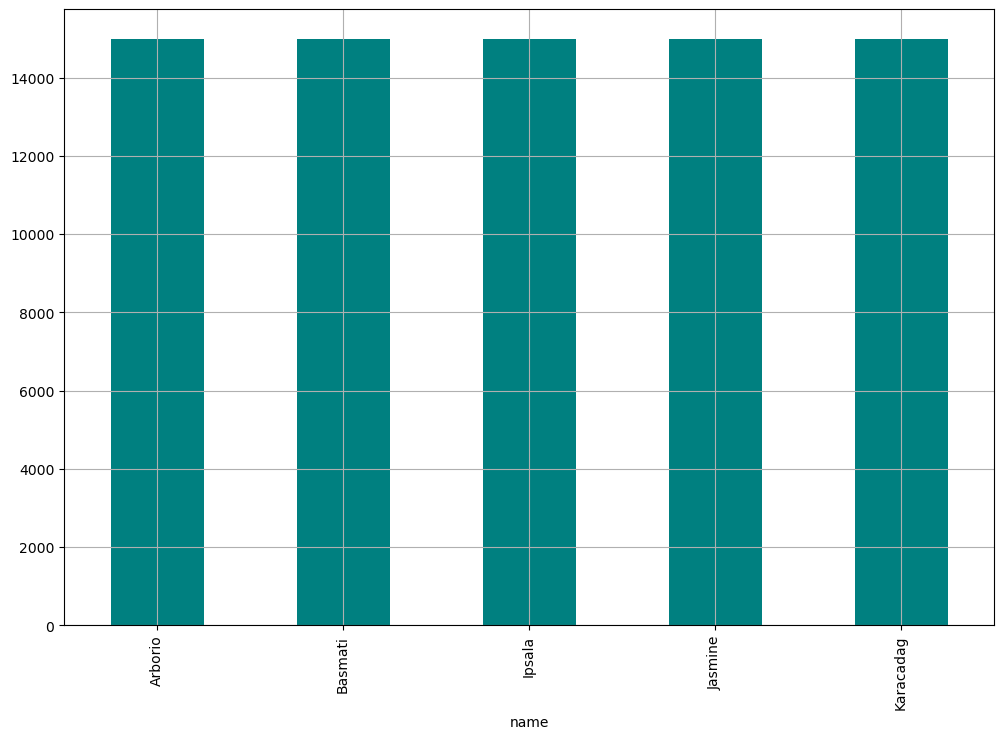

In [13]:
df.name.value_counts().plot(kind='bar', figsize=(12, 8), grid=True, color='teal')

Visualize Data Distribution

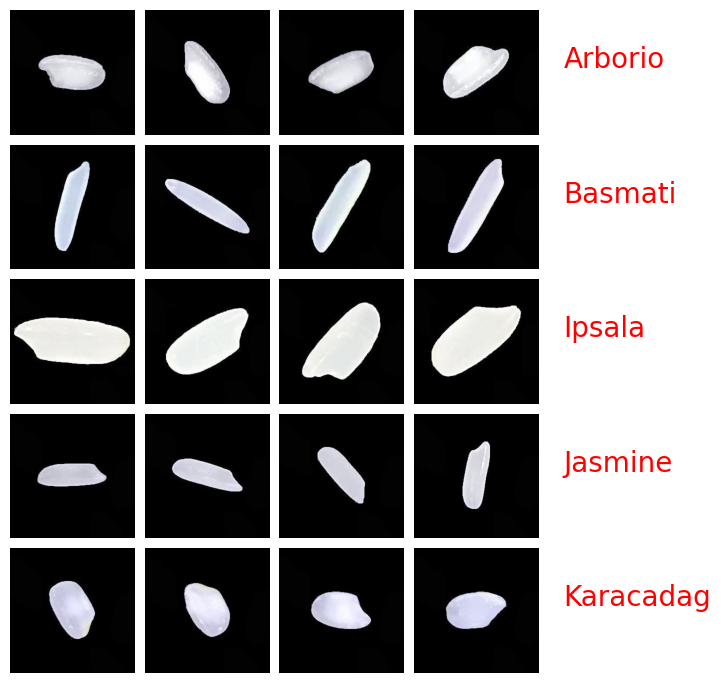

In [15]:
fig = plt.figure(1, figsize=(15,15))
grid = ImageGrid(fig, 121, nrows_ncols=(5,4), axes_pad=0.10)
i = 0
for category_id, category in enumerate(df.name.unique()):
    for filepath in df[df['name'] == category]['link'].values[:4]:
        ax = grid[i]
        img = Image.open(filepath)
        ax.imshow(img)
        ax.axis('off')
        if i % 4 == 4-1:
            ax.text(300, 100, category, verticalalignment='center', fontsize=20, color='red')
        i += 1
        
plt.show()

Split Data into Training and Testing Sets

In [11]:
import splitfolders

splitfolders.ratio(r'C:\Users\Administrator\Desktop\Data Science Projects\Rice_Image_Dataset', 
                    output='./', seed=101, ratio=(.8, .1, .1))

Copying files: 75000 files [27:43, 45.08 files/s] 


Create Data Generators

In [32]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get image paths
image_link = list(Path(r'C:\Users\Administrator\Desktop\Data Science Projects\Rice_Image_Dataset').glob(r'**/*.jpg'))

# Extract image names from paths (before converting to strings)
image_name = [x.parents[0].stem for x in image_link]

# Convert Path objects to strings
image_link = [str(path) for path in image_link]

# Encode image labels
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

# Create a DataFrame
df = pd.DataFrame()
df['link'] = image_link
df['name'] = image_name
df['label'] = image_label

# Split the DataFrame into training and testing sets (example)
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Create ImageDataGenerators
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe=train_df,
    x_col='link',
    y_col='name',
    color_mode='rgb',
    batch_size=32,
    target_size=(28, 28),
    class_mode='categorical',
    subset='training'
)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe=test_df,
    x_col='link',
    y_col='name',
    color_mode='rgb',
    batch_size=32,
    target_size=(28, 28),
    class_mode='categorical'
)

print(train_images)
print(test_images)


Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


Build and Compile the Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Number of unique classes
num_classes = len(np.unique(image_label))

# Define the model
model = Sequential([
    Input(shape=(28, 28, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,893 (2.65 MB)

 Trainable params: 693,893 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [38]:
model.fit(train_images, epochs=3)

Epoch 1/3


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1086s 578ms/step - accuracy: 0.9007 - loss: 3.2719
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 155s 83ms/step - accuracy: 0.9722 - loss: 0.0846
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 83ms/step - accuracy: 0.9787 - loss: 0.0660


Evaluate the Model

In [41]:
model.evaluate(test_images)

  1/469 ━━━━━━━━━━━━━━━━━━━━ 1:48 231ms/step - accuracy: 1.0000 - loss: 0.0304

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 316s 675ms/step - accuracy: 0.9831 - loss: 0.0574


[0.05387720838189125, 0.9833333492279053]

In [95]:
model.evaluate(test_images)

469/469 ━━━━━━━━━━━━━━━━━━━━ 334s 713ms/step - accuracy: 0.9820 - loss: 0.0544


[0.05387721210718155, 0.9833333492279053]